## Setup & Load Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sumit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sumit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sumit\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
# Load the Sentiment140 dataset into a pandas DataFrame
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)

In [4]:
df.shape

(1600000, 6)

In [5]:
# Display basic information
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


**No column names exist, lets assign column names**

In [6]:
# Assigning meaningful column names
df.columns = ['sentiment', 'id', 'date', 'flag', 'user', 'text']
df.head()

,sentiment,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 sentiment    0
id           0
date         0
flag         0
user         0
text         0
dtype: int64


In [9]:
# Check for duplicate tweets
duplicates = df.duplicated(subset=['text']).sum()
print(f"Number of duplicated tweets: {duplicates}")

Number of duplicated tweets: 18534


In [10]:
# Replacing Sentiment values with meaningful labels
df['sentiment'] = df['sentiment'].replace({0: 'Negative', 4: 'Positive'})

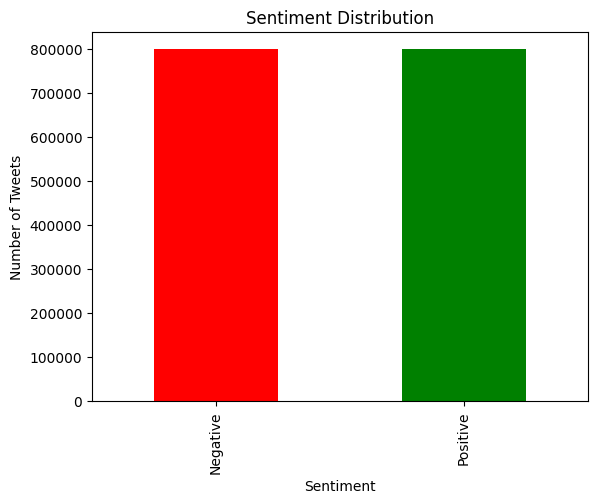

In [11]:
# Replacing Sentiment labels for readability
df['sentiment'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

**Explore tweet Lengths**

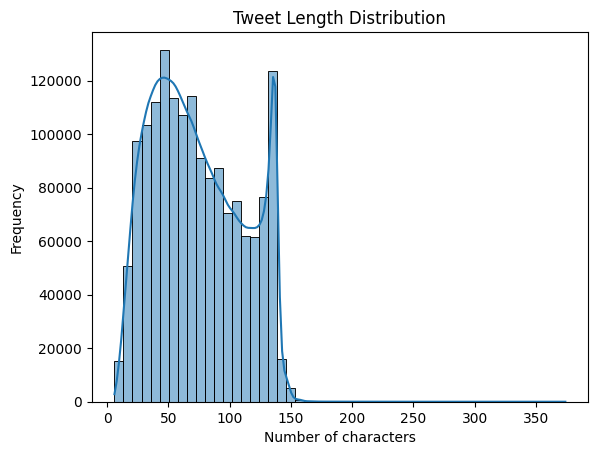

In [12]:
# Add a new column for tweet length
df['tweet_length'] = df['text'].apply(len)

# Plot distribution of tweet length
sns.histplot(df['tweet_length'], bins=50, kde=True)
plt.title('Tweet Length Distribution')
plt.xlabel('Number of characters')
plt.ylabel('Frequency')
plt.show()

## Data Preprocessing

**Since the texts are tweets, it could contains unnecessary URLs, @mentions, and hastags**

In [13]:
def clean_tweet(text):
    import re
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"https?://\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#", "", text)  # Remove only '#' from hashtags
    text = re.sub(r"[^a-z\s]", "", text)  # Remove non-alphabet characters
    return text

# Apply cleaning to dataframe
df['cleaned_text'] = df['text'].apply(clean_tweet)
df[['text', 'cleaned_text']].head()


,text,cleaned_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...


**Remove Stopwords**

In [14]:
# Define stopwords set
stop_words = set(stopwords.words('english'))
stop_words.update(["amp", "rt", "lt", "gt"])  # Common social media noise words

# Function to remove stopwords
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

# Apply stopword removal and update the existing column
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)

# Display results
df[['text', 'cleaned_text']].head()

,text,cleaned_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...
1,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
3,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


## Data Exploration

**Lets check the most common words used in each sentiment display**

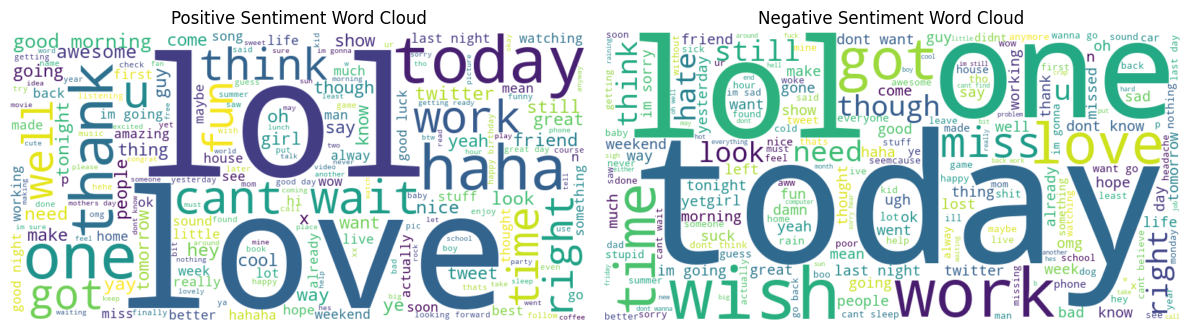

In [15]:
from wordcloud import WordCloud
# Separate positive and negative tweets
positive_tweets = df[df['sentiment'] == 'Positive']['cleaned_text']
negative_tweets = df[df['sentiment'] == 'Negative']['cleaned_text']

# Combine all positive and negative tweets into one large string
positive_text = " ".join(positive_tweets)
negative_text = " ".join(negative_tweets)

# Create word clouds for positive and negative sentiment
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plotting the word clouds
plt.figure(figsize=(12, 6))

# Positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Positive Sentiment Word Cloud")
plt.axis('off')

# Negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Negative Sentiment Word Cloud")
plt.axis('off')

plt.tight_layout()
plt.show()


**Tweet length vs Sentiment**

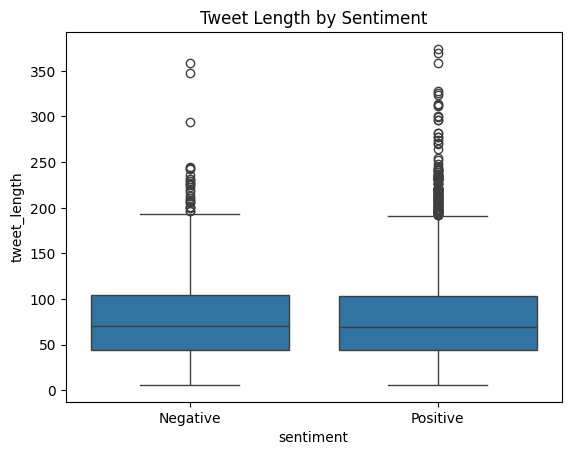

In [16]:
# Tweet length by sentiment
sns.boxplot(x='sentiment', y='tweet_length', data=df)
plt.title('Tweet Length by Sentiment')
plt.show()

**Exploring Timestamp vs Sentiment Analysis**

In [17]:
# Remove the timezone manually before conversion
df['date'] = df['date'].str.replace(r' [A-Z]{3,4} ', ' ', regex=True)

# Convert to datetime
df['date'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S %Y', errors='coerce')
df['date'].head()

0   2009-04-06 22:19:45
1   2009-04-06 22:19:49
2   2009-04-06 22:19:53
3   2009-04-06 22:19:57
4   2009-04-06 22:19:57
Name: date, dtype: datetime64[ns]

In [18]:
# Extracting useful time features
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.day_name()

<Figure size 1200x600 with 0 Axes>

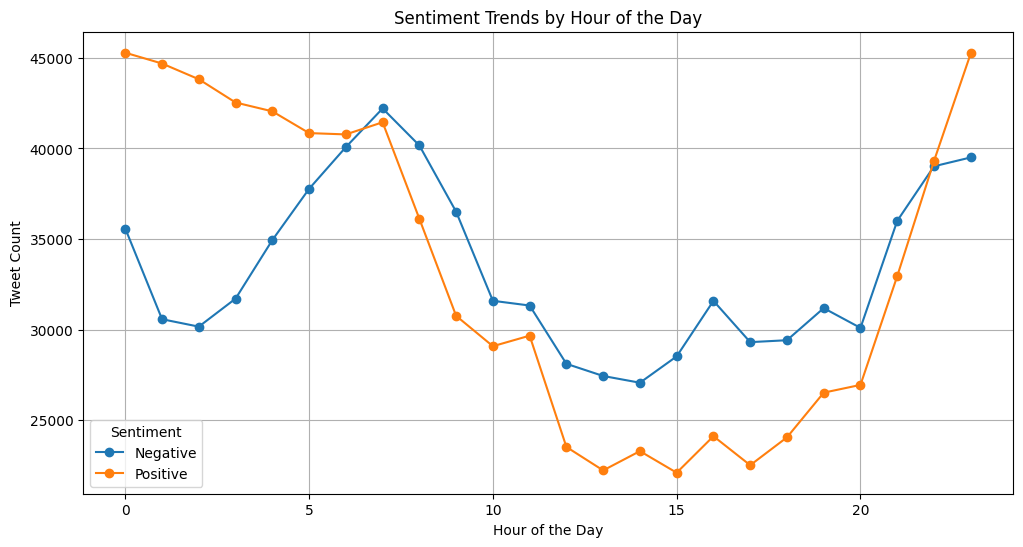

In [19]:
# Group by hour and sentiment, then count occurrences
hourly_sentiment = df.groupby(['hour', 'sentiment']).size().unstack()

# Convert index to integer (ensure 'hour' is numeric)
hourly_sentiment.index = pd.to_numeric(hourly_sentiment.index, errors='coerce')

# Sort index to maintain correct hourly order
hourly_sentiment = hourly_sentiment.sort_index()

# Ensure numeric values for plotting
hourly_sentiment = hourly_sentiment.astype(float)

# Plot the sentiment distribution over hours
plt.figure(figsize=(12,6))
hourly_sentiment.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Sentiment Trends by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Tweet Count')
plt.legend(title="Sentiment")
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

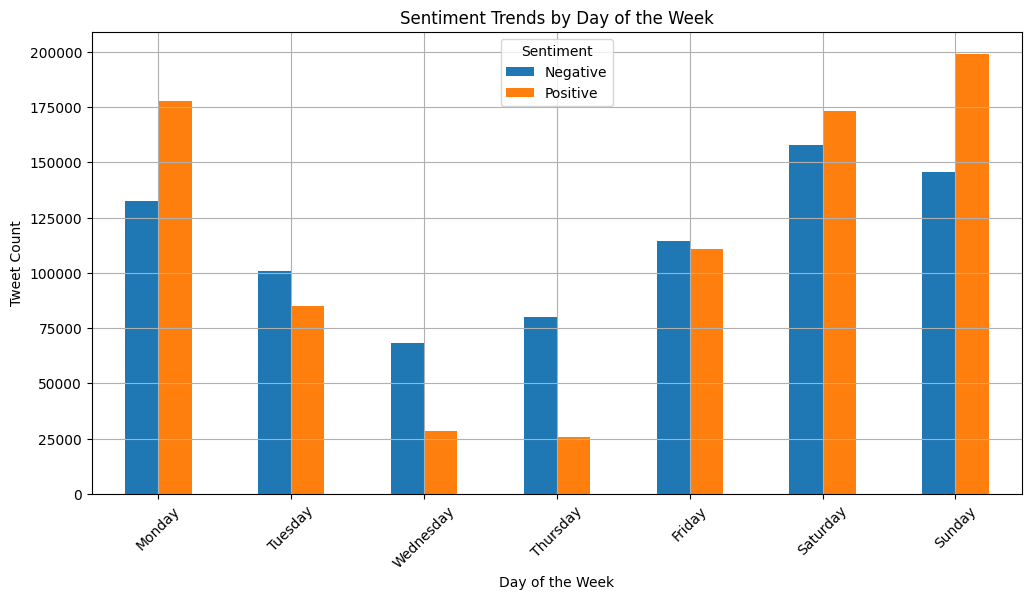

In [20]:
# Group by day of the week and sentiment
weekday_sentiment = df.groupby(['day_of_week', 'sentiment']).size().unstack()

# Reorder the days of the week for proper visualization
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_sentiment = weekday_sentiment.reindex(order)

# Plot the sentiment distribution over the week
plt.figure(figsize=(12,6))
weekday_sentiment.plot(kind='bar', figsize=(12,6))
plt.title('Sentiment Trends by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Tweet Count')
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The analysis shows that positive sentiment peaks late at night and on weekends, while negative sentiment is highest in the morning (5-10 AM) and on Mondays, likely due to work-related stress. Weekends (Saturday & Sunday) have the most positive tweets, while mid-week (Wednesday & Thursday) shows lower positivity, possibly due to fatigue. Friday acts as a transition day, with positivity rising in anticipation of the weekend. These insights can help in timing social media engagement, understanding stress patterns, and optimizing content strategy based on user sentiment trends.

**Exploring User-Based Sentiment Patterns**
<br>I aim to explore how individual Twitter users express sentiment through their tweets. By aggregating tweet sentiments at the user level and calculating their average sentiment scores, I classified users into three categories: Mostly Positive, Mostly Negative, and Mixed.

In [21]:
# Map textual sentiment to binary values
sentiment_map = {'Negative': 0, 'Positive': 1}
df['sentiment_numeric'] = df['sentiment'].map(sentiment_map)

# Group by user and calculate the average sentiment score
user_sentiment = df.groupby('user')['sentiment_numeric'].mean().reset_index()
user_sentiment.columns = ['user', 'average_sentiment']

# Classify users based on average sentiment
# Thresholds: ~0 = always negative, ~1 = always positive, 0.4–0.6 = mixed
def classify_user(avg_sent):
    if avg_sent >= 0.9:
        return 'Mostly Positive'
    elif avg_sent <= 0.1:
        return 'Mostly Negative'
    else:
        return 'Mixed'

# Apply classification
user_sentiment['sentiment_profile'] = user_sentiment['average_sentiment'].apply(classify_user)


C:\Users\sumit\AppData\Local\Temp\ipykernel_19000\847384089.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=user_sentiment, x='sentiment_profile', palette='coolwarm')


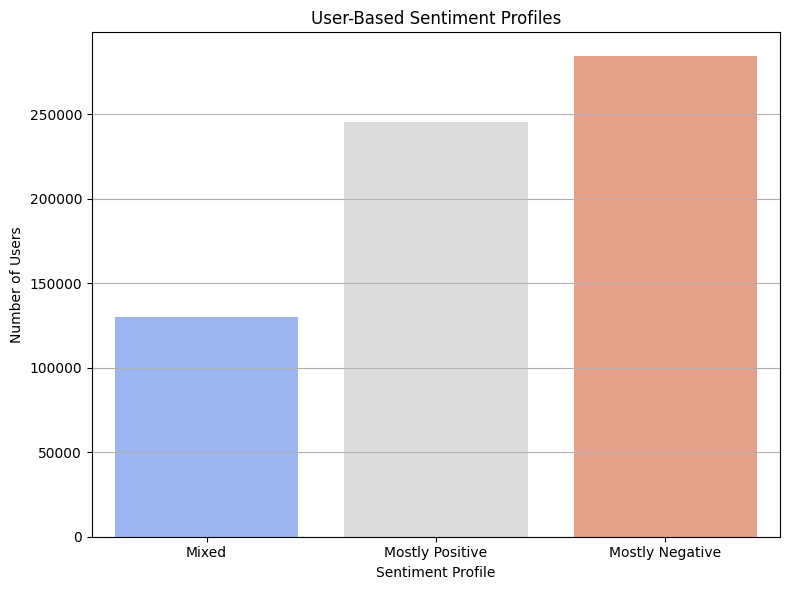

In [22]:
# Visualize user sentiment profiles

# Plot user sentiment profile counts
plt.figure(figsize=(8, 6))
sns.countplot(data=user_sentiment, x='sentiment_profile', palette='coolwarm')
plt.title('User-Based Sentiment Profiles')
plt.xlabel('Sentiment Profile')
plt.ylabel('Number of Users')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Interpretation of Results

The chart shows that most users tend to consistently post either positive or negative tweets, rather than a mix. 

- **Mostly Negative** users dominate, suggesting Twitter is often used to express frustration or complaints.
- **Mostly Positive** users are also prominent, indicating many use the platform to share appreciation or uplifting content.
- **Mixed Sentiment** users are fewer, implying people typically stick to a consistent emotional tone online.

These findings highlight emotional polarization among users and provide useful insight into how people express themselves on social media.


## Data Modeling

**Convert Text Data into Features (TF-IDF)**
Transform tweets into numerical form using TF-IDF (Term Frequency - Inverse Document Frequency).

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

# Convert text into TF-IDF vectors
X = tfidf.fit_transform(df['cleaned_text'])

# Define target variable (sentiment)
y = df['sentiment'].map({'Positive': 1, 'Negative': 0})  # Convert labels to binary (1 = Positive, 0 = Negative)

print("TF-IDF Matrix Shape:", X.shape)

TF-IDF Matrix Shape: (1600000, 5000)


In [24]:
from sklearn.model_selection import train_test_split 

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (1280000, 5000)
Testing Set Shape: (320000, 5000)


**Train Logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression

# Initialize and train logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict on test set
y_pred_log = log_model.predict(X_test)

**Train Naive Bayes**

In [26]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on test set
y_pred_nb = nb_model.predict(X_test)


Model Evaluation

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Evaluate Naive Bayes
print("Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Logistic Regression Performance:
Accuracy: 0.77704375
              precision    recall  f1-score   support

           0       0.79      0.75      0.77    160000
           1       0.76      0.80      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

Naive Bayes Performance:
Accuracy: 0.7599125
              precision    recall  f1-score   support

           0       0.76      0.77      0.76    160000
           1       0.76      0.75      0.76    160000

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



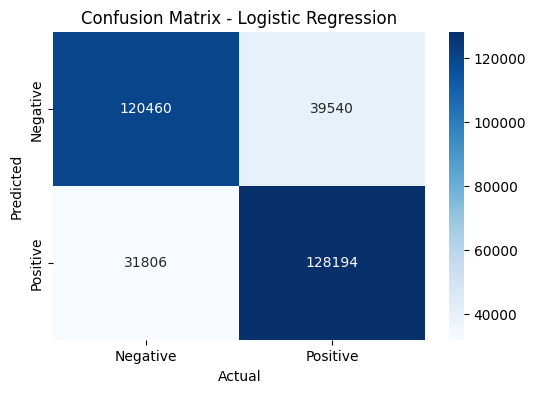

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for logistic regression
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Analysis of Model Performance
The Logistic Regression model achieved an accuracy of 77.38%, outperforming Naive Bayes (75.75%) by a small margin. Logistic Regression also had a slightly better F1-score (0.78 for positive sentiment, 0.77 for negative sentiment), indicating it balances precision and recall effectively. The confusion matrix provides a deeper look at the model's strengths and weaknesses:

- True Negatives (120,183): Correctly classified negative tweets.
- True Positives (127,436): Correctly classified positive tweets.
- False Negatives (32,564): Model misclassified 32,564 positive tweets as negative.
- False Positives (39,817): Model misclassified 39,817 negative tweets as positive.

Naive Bayes, while slightly less accurate, still performed well (76% accuracy) and showed nearly equal precision and recall, making it a good baseline model for text classification. However, it tends to overemphasize word frequency, making it less effective when handling complex sentiment relationships compared to Logistic Regression.

Overall, Logistic Regression is the better-performing model, but the results indicate room for improvement,

*Lets work on some user input from our logistic regression model.*

In [29]:
def predict_sentiment(user_text, model, vectorizer):
    # Clean the input using your existing clean_tweet function
    cleaned_text = clean_tweet(user_text)
    
    # Transform text into vector
    vector = vectorizer.transform([cleaned_text])
    
    # Predict
    prediction = model.predict(vector)[0]
    
    # Output label
    return "Positive" if prediction == 1 else "Negative"

In [30]:
# Define your tricky sentences
test_sentences = [
    "Oh great, another rainy day. Fantastic.",
    "I hate how much I love this show.",
    "It's fine I guess.",
    "Thanks for nothing.",
    "I feel numb and empty.",
    "I'm not angry, just disappointed.",
    "Well done, you ruined everything.",
    "The food was cold but the service was good."
]

# Loop through and print predictions
for sentence in test_sentences:
    result = predict_sentiment(sentence, log_model, tfidf)
    print(f"Tweet: {sentence}\nPredicted Sentiment: {result}\n")


Tweet: Oh great, another rainy day. Fantastic.
Predicted Sentiment: Positive

Tweet: I hate how much I love this show.
Predicted Sentiment: Negative

Tweet: It's fine I guess.
Predicted Sentiment: Positive

Tweet: Thanks for nothing.
Predicted Sentiment: Positive

Tweet: I feel numb and empty.
Predicted Sentiment: Negative

Tweet: I'm not angry, just disappointed.
Predicted Sentiment: Negative

Tweet: Well done, you ruined everything.
Predicted Sentiment: Negative

Tweet: The food was cold but the service was good.
Predicted Sentiment: Negative



Lets try another model as well<br>
**Training SVM Model**

In [31]:
from sklearn.svm import LinearSVC

# Initialize the Linear SVM model
svm_model = LinearSVC()

# Train the model on the training data
svm_model.fit(X_train, y_train)

LinearSVC()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.77659375
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77    160000
           1       0.76      0.81      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

Confusion Matrix:
 [[119630  40370]
 [ 31120 128880]]


## Next Steps for Improved Modeling & Reporting

Incorporate N-grams in TF-IDF
Why? Unigrams (single words) often miss out on context. Bigrams or trigrams (e.g., "not good", "very happy") help models understand phrase-level sentiment, which can significantly improve classification performance.

In [35]:
# Update TF-IDF Vectorizer to include unigrams and bigrams
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)  # Unigrams + Bigrams
X = tfidf.fit_transform(df['cleaned_text'])

Performs 5-fold cross-validation on the dataset using Logistic Regression. The output gives accuracy across folds and helps assess model consistency.

In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Average Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.77266875 0.77098438 0.76956875 0.77733438 0.77264375]
Average Accuracy: 0.77264


In [37]:
feature_names = tfidf.get_feature_names_out()
coefficients = log_model.coef_[0]

# Top positive and negative words
top_pos_indices = coefficients.argsort()[-10:][::-1]
top_neg_indices = coefficients.argsort()[:10]

print("Top Positive Words:")
for idx in top_pos_indices:
    print(f"{feature_names[idx]}: {coefficients[idx]:.4f}")

print("\nTop Negative Words:")
for idx in top_neg_indices:
    print(f"{feature_names[idx]}: {coefficients[idx]:.4f}")

Top Positive Words:
cant wait: 7.8928
wish luck: 4.7315
congratulations: 4.5119
smile: 4.4709
thank: 4.4306
cannot wait: 4.3898
thanks: 4.0500
proud: 3.8839
followfriday: 3.8232
smiling: 3.6744

Top Negative Words:
sad: -9.5562
sadly: -6.6440
bummed: -6.1961
unfortunately: -5.9075
rip: -5.8067
sick: -5.7755
miss: -5.7661
disappointed: -5.7478
died: -5.6105
hurts: -5.5638


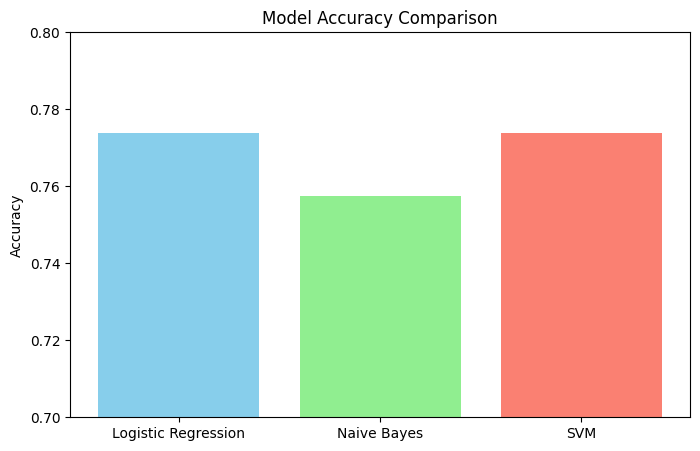

In [38]:
# Visualize model Comparisons

models = ['Logistic Regression', 'Naive Bayes', 'SVM']
accuracies = [0.7738, 0.7575, 0.7739]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.8)
plt.show()


## Working with BERT
While traditional models performed well, they struggled with nuanced language like sarcasm or mixed emotions. To overcome this, I now try implementing BERT, a transformer-based model that understands context more effectively, making it ideal for improving sentiment classification on social media text.

In [ ]:
df.head()

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

### Setup and Tokenization

In [ ]:
# Custom PyTorch Dataset class for handling text and labels
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        # Store the raw input data and tokenizer parameters
        self.texts = texts                      # List of tweet texts
        self.labels = labels                    # Corresponding sentiment labels (0 or 1)
        self.tokenizer = tokenizer              # Pretrained tokenizer (e.g., DistilBERT tokenizer)
        self.max_len = max_len                  # Maximum sequence length for padding/truncation

    def __len__(self):
        # Returns the number of samples in the dataset
        return len(self.texts)

    def __getitem__(self, idx):
        # Retrieves a single item by index for batching
        text = str(self.texts[idx])             # Get the tweet text at index
        label = self.labels[idx]                # Get the corresponding label

        # Tokenize the text and prepare inputs for BERT
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,            # Add [CLS] and [SEP] tokens
            max_length=self.max_len,            # Limit to max_len tokens
            return_token_type_ids=False,        # Not needed for DistilBERT
            padding='max_length',               # Pad to max_len
            truncation=True,                    # Truncate if longer than max_len
            return_attention_mask=True,         # Include attention mask
            return_tensors='pt'                 # Return PyTorch tensors
        )

        # Return a dictionary containing input IDs, attention mask, and label
        return {
            'input_ids': encoding['input_ids'].flatten(),           # Flatten to 1D tensor
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)         # Convert label to tensor
        }

### Prepare Data

In [ ]:
# Binary encoding: positive = 1, negative = 0
df['sentiment'] = df['sentiment'].map({'Positive': 1, 'Negative': 0})

# Split dataset
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['cleaned_text'], df['sentiment'], test_size=0.2, random_state=42
)

# Tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
MAX_LEN = 64
BATCH_SIZE = 32

# Dataset and DataLoader
train_dataset = SentimentDataset(train_texts.tolist(), train_labels.tolist(), tokenizer, MAX_LEN)
val_dataset = SentimentDataset(val_texts.tolist(), val_labels.tolist(), tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

### Initialize model
For this project, DistilBERT is used instead of the full BERT model due to its efficiency. It is a distilled version of BERT that maintains most of its performance while significantly reducing computational load and training time, making it suitable for fine-tuning on sentiment classification tasks.

In [ ]:
# Load a pre-trained DistilBERT model specifically for sequence classification
# 'num_labels=2' sets the task as binary classification (positive vs negative)
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased', 
    num_labels=2  # We have 2 classes: 0 = Negative, 1 = Positive
)

# Check if a GPU is available and use it if possible; otherwise, fall back to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the selected device (GPU or CPU)
model = model.to(device)

### Fine-Tune DistilBERT 

In [ ]:
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from tqdm import tqdm

# Optimizer and loss function
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = CrossEntropyLoss()

# Training parameters
EPOCHS = 2  # You can set to 3–4 if time allows

# Training loop
for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch + 1}/{EPOCHS}")
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader):
        # Move inputs to GPU/CPU
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Average training loss: {total_loss / len(train_loader):.4f}")